In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({'공부시간(x)' : [1,2,3,4,5,7,8,10,12,13,14,15,18,20,25,28,30],
                   '시험점수(t)' : [5,7,20,31,40,44,46,49,60,62,70,80,85,91,92,97,98]})

df.head()

,공부시간(x),시험점수(t)
0,1,5
1,2,7
2,3,20
3,4,31
4,5,40


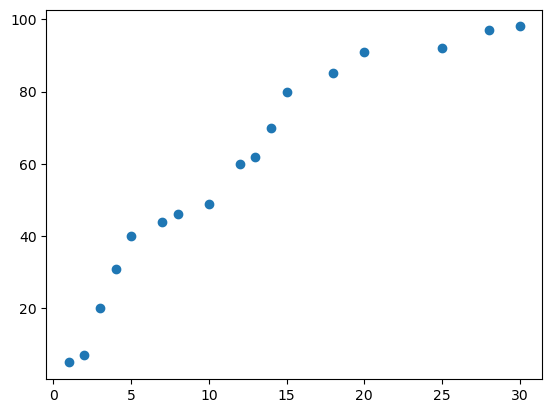

In [2]:
# 독립변수가 1개이고 종속변수가 연속적인 숫자
# 종속변수가 분류값이 아니기 때문에 Regression
# 만약, 종속변수가 분류값이면 Classification
# 특히 독립변수가 1개인 경우: Simple Linear Regression
# Simple Linear Regression (선형회귀)는 1차 직선으로 표현됨

# 데이터를 2차원 평면에 점으로 나타내기
# scatter 이용

plt.scatter(df['공부시간(x)'], df['시험점수(t)'])
plt.show()

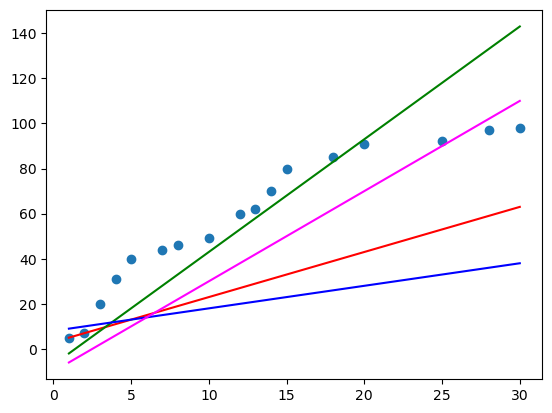

In [4]:
plt.scatter(df['공부시간(x)'], df['시험점수(t)'])

# 모델: y = ax + b 
plt.plot(df['공부시간(x)'], df['공부시간(x)'] * 2 + 3, color='r')
plt.plot(df['공부시간(x)'], df['공부시간(x)'] * 5 - 7, color='g')
plt.plot(df['공부시간(x)'], df['공부시간(x)'] * 1 + 8, color='b')
plt.plot(df['공부시간(x)'], df['공부시간(x)'] * 4 - 10, color='magenta')
plt.show()

In [ ]:
# 데이터를 가장 잘 표현하는 직선을 찾아가는 과정 -> Learning(학습)
# 머신러닝에서 선형 모델 표현: y = Wx + b
# W: weight, b: bias

# 독립변수가 1개인 회귀모델: y = Wx + b

In [ ]:
# 직선을 찾는 과정
# Error(오차)를 이용
# 오차: 실제 값과 예측된 값의 차이 (t와 y의 간격)
#     - (t - y)
#     - 음수 값이 나올 수 있다
# 오차는 각 실제 값마다 하나씩 생김
# 오차를 모아서 데이터와 모델 간의 차이를 하나의 수치로 나타내려면
# 부호 문제 때문에 그냥 더하면 안된다
# 각각의 오차를 제곱하여 평균을 구한다 -> 모델과 데이터의 차이 명시

# 평균제곱오차(MSE: Mean Squared Error)
# 평균제곱오차가 가장 작은 model(y = Wx + b)을 찾기
# == MSE가 최소가 되는 W, b를 구하기

# loss function
#     - 손실함수(loss function), 비용함수(cost function)
#     - W, b를 구하기 위한 기준 함수
#     - loss function 값이 작을수록 좋은 모델
# MSE: loss function 역할

In [7]:
# 구현
import numpy as np
import pandas as pd
import tensorflow as tf

# Sequential: 모델 박스, 데이터가 layer들을 순차적으로 흘러가며 처리됨
from tensorflow.keras.models import Sequential

# Flatten: input layer 용도, Dense: output layer 용도
from tensorflow.keras.layers import Flatten, Dense


# W, b를 update 하기 위해서 Gradient Descent 알고리즘 이용
# 이러한 기능을 하는 것을 통칭 -> Optimizer
from tensorflow.keras.optimizers import SGD

# Training Data Set
# 지도학습 -> x data, t data
# 내부적으로는 2차원 행렬곱 연산 수행
# x data와 t data는 2차원으로 표현해야 함
x_data = np.array([1, 2, 3, 4, 5]).reshape(5,1)
t_data = np.array([3, 5, 7, 9, 11]).reshape(5,1)


# model 만들기
model = Sequential()

# model 안에 layer 밀어넣기
model.add(Flatten(input_shape=(1,)))
model.add(Dense(1, activation='linear'))

# model의 속성 지정
model.compile(optimizer=SGD(learning_rate=1e-2),
              loss='mse')

# 학습 시작
model.fit(x_data,
          t_data,
          epochs=5000,
          verbose=0)

In [8]:
# 학습 완료
# 예측
result = model.predict([[10]])
result

1/1 [==============================] - 0s 93ms/step


array([[21.000032]], dtype=float32)